# $$\text{Kickstart Project 1  update 8}$$

$$\text{The Goal of this review is to conduct exploratory data analysis.}$$

$$\text{Also, we wish to create a baseline model(s) for predicting the outcome of a kickstarter project (succuessful vs. failure).}$$

$$\text{After going over all the data, I think a fresh approach is needed.}$$

$$\text{The following is a better approach.}$$

$$\text{By EG Timerise}$$

### $$\text{We will review  a few different key classification methods to see which works beter for our problem.}$$

$\text{The list of classification method/ tools use in this report are as follows :}$

$\text{1.) Binary Logistic Regression}$

$\text{2.) RandomForest}$

$\text{3.) Neural Network }$

$\text{4.) ADA boosting}$

# $$\text{Defining the parameters of the prediction question.}$$

$$\text{So, there are atleast (4) general overall cases/situations for predicting the outcome of an event.}$$

### $\text{1.) The case where we are at the start of the deciding process, i.e. we haven't gain information  about any of the final results that would heavly aid in the prediction. 'we are at the start of the race looking forward.}$

### $\text{2.) The case where we are at the end of the gain information process, i.e. we have gain all useful information that could heavely aid in the prediction. 'We are at the end of the race looking backwards, yet we still don't know the outcome.}$

### $\text{3.) The case where we are some where inbetween starting  and ending the task. 'We are looking forwards and backwards.}$

### $\text{4.) The case where we have past experience , but we are performing one of the first 3 cases.}$

   $\text{We have a past educated guess over our current unknown outcome, thus we apply past known information to aid in the prediction.}$
   
## $\text{In this case reivew, we will look at the first case / situation}$

#### $\text{Our target question will be the same:}$

  
$$\text{ * Which kickstarter projects will be successful or a failure at raising  its goal funds?}$$

#### $\text{Our target variable:}$

$$\text{*'state'- attributes : Failed and successful }$$

## Case/situation 1

'We are at the start of the race looking forward, with no educated knowldege about past probabilies of the data set.'

* The target variable (state) is a multivariable catgorical variable yielding the following outcomes at the end of the data collection phase: 
  * Successful
  * Failure
  * Live
  * Canceled
  * Suspended
  * undefined
  
### We seek to predict which projects will be a success or a failure at reaching their goal funds.
 
 
$\text{From the point of view of the gambler, one could say that 'cancelled' is a fancy way of saying failure.}$

 * Ideally we would have some way to rate  if its ok to list 'cancelled' as a fail, via  example: the project didn't switch to a canceled until  25% of the fund raising project was already finish. 
 
* Thus if we use cancelled, we would be playing around with more randomness then needed. 

 * So we have the option of droping or keeping 'cancelled'

 #### * For example:  Someone starts a Kickstarter project at 6 p.m. on Aug/5/2000 then cancels on 6 p.m. Aug/6/2000 , when their project deadline was listed as Dec/31/2000.

#### We will  drop 'Canceled',  'suspened' , and 'live', and 'undefined' since there is no end date/outcome list to structure a successfu/failure prediction. 

## Case 1 predictors break down

We have the option of using 'id' as an index for the observations, which we will use (depending).

Our given possible predicter(feature) variables are as follows:

* name

* main_category

* deadline 

* launched

* country

* usd_goal_real

### From the data set source , we know that the following variables are useless:

* pledged

* goal

* usd pledged

* only useless in the sense that they are highly correlated with other variables:

* : category      highly correlated with main_category

* : currency      highly correlated with country


### Because of our situation, we can't use the following variables as predicts as well:


* backers

* usd_pledged_real

#### We wouldn't know this information at the start looking forward position. 

#### Plus we wouldn't have the means to make estimations for them.(usually)

# Lets start by doing some preprocessing of the data set

In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv(r"C:\Users\dragon\Desktop\Data_set_locations\Kickstarter\kickstarterpj1EG.csv")
pd.set_option('mode.chained_assignment',None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
id                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


### $\text{We can see all the variable types using the python function '.info()'}$
$\text{We can see that the variables are not evenly matched, due to their observation counts.}$ 
$\text{Also, we can see all the variables previously mention as not useful.}$
$\text{Lets first drop the unwanted variables, then reset the index.}$
$\text{Since we are dropping columns , its not really needed to reset the index.}$
$\text{Its just a really important tool, so I wanted in the project for futue reviews.}$
$\text{Since I want to do deep learning, I will create my own clusters for 'category' in the training set.}$
$\text{If I do it outside the training set, it would be highy bias. I don't want my clusters to be controlled by the vaildation or test set.}$

In [2]:
df=df.drop(['id','backers','usd_pledged_real','pledged','goal','usd pledged','main_category','currency'],axis=1)
df.reset_index(drop=True,inplace=True)

$\text{Using boolean function from python and a row summing function, we can figure out which columns have missing observations.}$
$\text{We know that there isn't any special case where missing values is ok for this data set.}$

In [3]:
df.isnull().sum(axis=0)

name             4
category         0
deadline         0
launched         0
state            0
country          0
usd_goal_real    0
dtype: int64

$\text{From the function output we see that the 'name' column has four missing observations.}$
$\text{Lets check out the rows with missing values in the 'name' column.}$
$\text{We will do this by using boolean notation '.isnull()'== True to have null value(missing).}$

In [4]:
df[df.name.isnull()]

,name,category,deadline,launched,state,country,usd_goal_real
166851,NaN,Narrative Film,2/29/2012,1/1/2012 12:35,failed,US,200000.00
307234,NaN,Video Games,1/6/2013,12/19/2012 23:57,failed,GB,3224.97
309991,NaN,Product Design,7/18/2016,6/18/2016 5:01,suspended,US,2500.00
338931,NaN,Painting,12/5/2011,11/6/2011 23:55,failed,US,35000.00


$\text{Juding from the observations, we don't see anything special.}$
$\text{Most likely these observations were simple human errors,lets drop them.}$
$\text{Also, lets run a row duplication check, with a sum function to sum them up.}$

In [5]:
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
df.duplicated().sum()

0

$\text{There doesn't seem to be any dulicate rows, which is real good news.}$
$\text{Lets apply a row duplication drop anyway, although its not really needed.}$
$\text{Also , lets double checkthat we don't have any missing values in our data set.}$

In [6]:
df=df.drop_duplicates()
df.isnull().sum()

name             0
category         0
deadline         0
launched         0
state            0
country          0
usd_goal_real    0
dtype: int64

$\text{Looks like the previous removals of NAN worked!}$
$\text{Lets remove the useless attributes of 'state' , using the replace and dropna functions.}$
$\text{We can then double check our drop function be looking at the unique attributes of 'state'.}$

In [7]:
df.state.replace('canceled',np.nan,inplace=True)
df.state.replace('live',np.nan,inplace=True)
df.state.replace('suspended',np.nan,inplace=True)
df.state.replace('undefined',np.nan,inplace=True)
df=df.dropna()
df.state.unique()

array(['failed', 'successful'], dtype=object)

$\text{Now lets double check the data set by using the '.info()' function.}$

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331672 entries, 0 to 378656
Data columns (total 7 columns):
name             331672 non-null object
category         331672 non-null object
deadline         331672 non-null object
launched         331672 non-null object
state            331672 non-null object
country          331672 non-null object
usd_goal_real    331672 non-null float64
dtypes: float64(1), object(6)
memory usage: 20.2+ MB


$\text{We now see that the data looks to be clean, but we are not done yet.}$
$\text{We will dive deeper into the data set to check for errors not easily seen.}$
$\text{We do this by looking at thevarious attributes of the different variables.}$
$\text{We seek to find any and all input errors.}$
### $\text{After running through all the variables visually we now check via python code.}$

In [9]:
df.country.unique()

array(['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'SE',
       'FR', 'NZ', 'CH', 'AT', 'BE', 'DK', 'HK', 'NL', 'LU', 'SG', 'N,0"',
       'JP'], dtype=object)

$\text{With help from the '.unique()', we found N,O",which shouldn't be a country name.}$
$\text{Lets check out the observations for N,0", before we decide to drop  it or transform it.}$

In [10]:
df[df.country=='N,0"'].head(10)

,name,category,deadline,launched,state,country,usd_goal_real
2457,An Oratorio for our Time - Last Stop Cafe,Music,5/26/2016,4/26/2016 19:46,successful,"N,0""",5000.00
4892,Jackson Ruby: The Cassette Album,Music,5/11/2016,4/11/2016 19:29,successful,"N,0""",5000.00
5353,Help Parker Brown make his first solo album,Music,5/21/2016,4/21/2016 16:14,successful,"N,0""",3800.00
5597,Help BETHANY record a NEW single in Nash!,Music,5/8/2016,4/4/2016 23:32,successful,"N,0""",3500.00
8260,Serena Gabriel's first CD!!!!!!: Diving Deep,Music,5/1/2016,3/25/2016 17:20,successful,"N,0""",3500.00
10086,"Leicester's Days of Glory, a 360Âº Virtual Rea...",Film & Video,5/29/2016,5/15/2016 20:55,failed,"N,0""",8659.38
10527,Debut Folk / Rock Album by The Blacklist Social!,Music,5/20/2016,4/15/2016 1:16,failed,"N,0""",4578.06
11191,Begin My Journey in Art,Music,4/24/2016,4/19/2016 20:05,failed,"N,0""",1500.00
13001,SCiO: Your Sixth Sense. A Pocket Molecular Sen...,Hardware,6/15/2014,4/29/2014 17:18,successful,"N,0""",200000.00
13048,LUME Festival 2016,Music,5/12/2016,4/11/2016 12:42,successful,"N,0""",5043.01


In [11]:
df.country.value_counts(dropna=False).tail(3)

N,0"    210
LU       57
JP       23
Name: country, dtype: int64

$\text{Since N,0"  is very rare and after inspection it doen't seem interesting, we will drop it.}$
$\text{We will also check out the other variables for possible issues.}$
$\text{The variable name is design differently , so we have to check out its uniqueness count.}$

In [12]:
df.country.replace('N,0"',np.nan,inplace=True)
df=df.dropna()
df.reset_index(drop=True,inplace=True)
print('Unique list for countries:')
print(df.country.unique())
print('\nUnique list for category names:')
print(df.category.unique())
print('\nUnique count for name variable:')
print(df.name.nunique())
print('\nData df shape:')
print(df.shape)
print('\ndeadline unique count:')
print(df.deadline.nunique())
print('\nLaunched unique count:')
print(df.launched.nunique())

Unique list for countries:
['GB' 'US' 'CA' 'AU' 'NO' 'IT' 'DE' 'IE' 'MX' 'ES' 'SE' 'FR' 'NZ' 'CH'
 'AT' 'BE' 'DK' 'HK' 'NL' 'LU' 'SG' 'JP']

Unique list for category names:
['Poetry' 'Narrative Film' 'Music' 'Restaurants' 'Food' 'Drinks'
 'Nonfiction' 'Indie Rock' 'Crafts' 'Games' 'Tabletop Games' 'Design'
 'Comic Books' 'Art Books' 'Fashion' 'Childrenswear' 'Theater' 'Comics'
 'DIY' 'Webseries' 'Animation' 'Food Trucks' 'Product Design' 'Public Art'
 'Documentary' 'Illustration' 'Photography' 'Pop' 'People' 'Art' 'Family'
 'Fiction' 'Film & Video' 'Accessories' 'Rock' 'Hardware' 'Software'
 'Weaving' 'Web' 'Jazz' 'Ready-to-wear' 'Festivals' 'Video Games'
 'Anthologies' 'Publishing' 'Shorts' 'Gadgets' 'Electronic Music'
 'Radio & Podcasts' 'Cookbooks' 'Apparel' 'Metal' 'Comedy' 'Hip-Hop'
 'Periodicals' 'Dance' 'Technology' 'Painting' 'World Music' 'Photobooks'
 'Drama' 'Architecture' 'Young Adult' 'Latin' 'Mobile Games' 'Flight'
 'Fine Art' 'Action' 'Playing Cards' 'Makerspaces' 'Punk'

$\text{All the other variables seem fine.}$ 
$\text{Looks like most of the kickstart projects have different names.}$
$\text{Launch and deadline times don't seem to that interesting based of uniqueness.}$
$\text{Seems that 'country' was the only variable with noticable imput errors.}$
$\text{Lets get a clear look at the data set formate then apply some more modifications.}$
$\text{There are a lot of categories , but don't worry, we will cluster them into two groups (in the training set).}$
$\text{One group will house all the caegories with low success rates in the training set , and the other will house those with high sucess rates.}$
$\text{The features/predictors are really up to the creater, but we have to try to stay unbias by not using the vaildation or test set to form them.}$

In [13]:
df=df.drop_duplicates()
df.head(1)

,name,category,deadline,launched,state,country,usd_goal_real
0,The Songs of Adelaide & Abullah,Poetry,10/9/2015,8/11/2015 12:12,failed,GB,1533.95


$\text{Lets make dummy variables for country.}$
$\text{We will set the base as the most freq attribute for each variable.}$
$\text{We set the base by droping the most freq attribute via its dummy variable location.}$
$\text{Checking freq attribute should be done in the training set, I actually did this is a earlier update, so I know US is the most freq.}$
$\text{This should , ideally , maximize the power of dummy variables kept.}$
$\text{The over all concern is staying as unbias as much as possible when creating a model.}$

In [14]:
pp=pd.get_dummies(df.country)
pp=pp.drop('US',axis=1)
df.reset_index(drop=True,inplace=True)

$\text{We also create a dummy variable base with 'US' for country.}$
$\text{Lets now check the lowest freq levels for country.}$

In [15]:
print(df.country.value_counts(dropna=False).tail(50))

US    261358
GB     29453
CA     12370
AU      6616
DE      3436
FR      2520
NL      2411
IT      2369
ES      1873
SE      1509
MX      1411
NZ      1274
DK       926
IE       683
CH       652
NO       582
BE       523
AT       485
HK       477
SG       454
LU        57
JP        23
Name: country, dtype: int64


$\text{We can combine low freq levels into new dummy attribute for both variables.}$
$\text{After much thought, I want to create 2 groups from various low freq variables in country.}$
$\text{This is pretty much very randomly driven, based on the fact that I think the predictors are too weakly seen.}$
$\text{The only thing really logical about my group selection was that it grouped closer freq lower attributes together.}$
$\text{These groups could easly be  swtiched , rearrange, or left alone.}$
$\text{Its good to note that we are setting the inital predictors, as we dive into the data our selection may change.}$

### $\text{The merge groups are as listed:}$

$\text{1.) (IT or NL or FR or DE or AU)=mid_country}$

$\text{2.) (HK or SG or LU or JP or AT or BE or NO or CH or IE or DK or NZ or MX or SE or ES )=low_country}$

$\text{Again, I want to stress that what I am about to do isn't a set method.}$
$\text{We could leave the groups as they were orginally or make different groups.}$
$\text{From my point of view, the attributes were not strongly seen in the data by themseleves.}$
#### $\text{*Notice that we also created a Mod_country to reflect our new groups.}$
$\text{We can use the '.info()' function to double check that we correctly merged the low freq variables into a new dummy variable.}$

In [16]:
pp['low_country']=pp.HK+pp.SG+pp.LU+pp.JP+pp.AT+pp.BE+pp.NO+pp.CH+pp.IE+pp.NZ+pp.MX+pp.SE+pp.ES+pp.DK
pp['mid_country']=pp.IT+pp.NL+pp.FR+pp.DE+pp.AU

pp=pp.drop(['HK','SG','LU','JP','AT','BE','NO','CH','IE','NZ','MX','SE','ES','IT','NL','FR','DE','AU','DK'],axis=1)
df['Mod_country']=df.country.copy(deep=False)
## Making a new variable for country and main_category to reflect merged groups.
df.Mod_country.replace(['HK','SG','LU','JP','AT','BE','NO','CH','IE','NZ','MX','SE','ES','DK'],'low_country',inplace=True)
df.Mod_country.replace(['IT','NL','FR','DE','AU'],'mid_country',inplace=True)


pp.reset_index(drop=True,inplace=True)
print('\n\n pp data set head:')
print(pp.head(1))

print('\n\ndf data information')
df=pd.concat([df,pp],axis=1)
print(df.info())



 pp data set head:
   CA  GB  low_country  mid_country
0   0   1            0            0


df data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331462 entries, 0 to 331461
Data columns (total 12 columns):
name             331462 non-null object
category         331462 non-null object
deadline         331462 non-null object
launched         331462 non-null object
state            331462 non-null object
country          331462 non-null object
usd_goal_real    331462 non-null float64
Mod_country      331462 non-null object
CA               331462 non-null uint8
GB               331462 non-null uint8
low_country      331462 non-null uint8
mid_country      331462 non-null uint8
dtypes: float64(1), object(7), uint8(4)
memory usage: 21.5+ MB
None


$\text{Now that we have created some interesting dummy variables, lets transform the 'name' feature to something interesting.}$
$\text{In a previous update I tried using the countvectorizer, but the words were not very freq.}$
$\text{Lets use the string length of each name recorded}$
$\text{Why the string length? Because some people are lazy , so they may react differently depending on how how much they have to read.}$
$\text{I don't have any proof about my previous statement, its just a personal hunch which may or may not be true.}$

In [17]:
df['name_length']=df.name.str.len()

$\text{Now lets transform the launched and deadline variables and also creat the variable Project_full_days.}$

In [18]:
df.launched=pd.to_datetime(df.launched,format='%m/%d/%Y %H:%M')                               
df.deadline=pd.to_datetime(df.deadline,format='%m/%d/%Y')
df['Project_full_days']=(df.deadline-df.launched).dt.days
df.drop(['deadline','launched','name'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331462 entries, 0 to 331461
Data columns (total 11 columns):
category             331462 non-null object
state                331462 non-null object
country              331462 non-null object
usd_goal_real        331462 non-null float64
Mod_country          331462 non-null object
CA                   331462 non-null uint8
GB                   331462 non-null uint8
low_country          331462 non-null uint8
mid_country          331462 non-null uint8
name_length          331462 non-null int64
Project_full_days    331462 non-null int64
dtypes: float64(1), int64(2), object(4), uint8(4)
memory usage: 19.0+ MB


$\text{Now lets check the the qualitiave variables , to see if we can apply a transformation for normalization on them.}$

$\text{Depending on the predictive model used, normalization  can greatly improve results.}$

$\text{Typically called box cox transformation, we are simply trying to make the variable outputs more bell shape.}$


In [19]:
import matplotlib.pyplot as plt
def histo_plot(dat,ti,xti):
    %matplotlib inline
    %config InlineBacked.figure_format='svg'
    _=plt.hist(dat)
    _=plt.title(ti)
    _=plt.xlabel(xti)
    _=plt.ylabel('count')
    return plt.show()
    

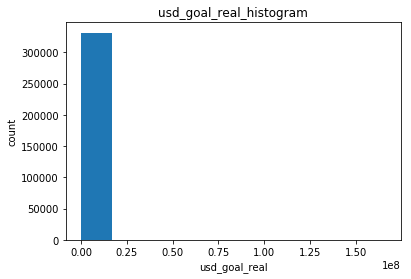

In [20]:
show=histo_plot(df.usd_goal_real,'usd_goal_real_histogram','usd_goal_real')
show

$\text{Lets apply a box cox transformation on it!}$

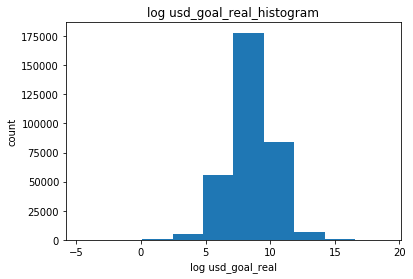

In [21]:
show=histo_plot(np.log(df.usd_goal_real),'log usd_goal_real_histogram','log usd_goal_real')
show

$\text{The log transformation looks good, lets keep it!}$

In [22]:
df['log_usd_goal_real']=np.log(df.usd_goal_real)

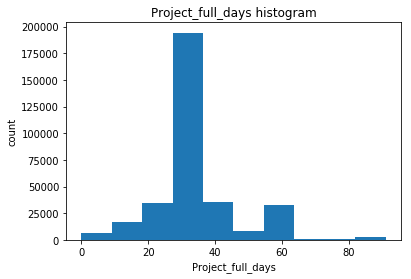

In [23]:
show=histo_plot(df.Project_full_days,'Project_full_days histogram','Project_full_days')
show

$\text{Lets apply a box cox transformation on it!}$

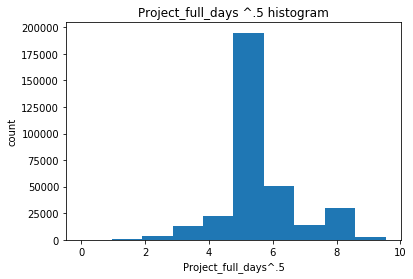

In [24]:
show=histo_plot(df.Project_full_days**.5,'Project_full_days ^.5 histogram','Project_full_days^.5')
show

$\text{I like it! , lets keep this transformation.}$

In [25]:
df['tran_Project_full_days']=df.Project_full_days**.5

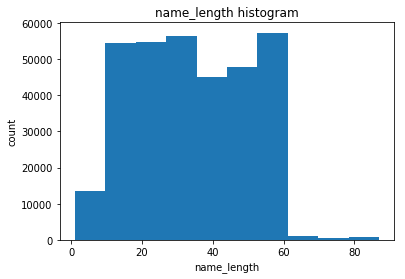

In [26]:
show=histo_plot(df.name_length,'name_length histogram','name_length')
show

$\text{Lets apply a box cox transformation on name_length}$

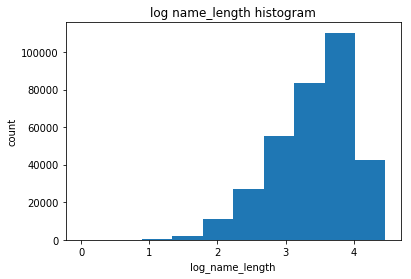

In [27]:
show=histo_plot(np.log(df.name_length),'log name_length histogram','log_name_length')
show

$\text{Not as good, but lets keep it!}$

In [28]:
df['log_name_length']=np.log(df.name_length)

$\text{Lets now break the target variable away from the predictors/features.}$
$\text{Then lets check out the final layout of the df data frame before spliting it.}$

In [29]:
y_response=pd.get_dummies(df.state)
y_response=y_response.drop('failed',axis=1)
df.drop('state',axis=1,inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331462 entries, 0 to 331461
Data columns (total 13 columns):
category                  331462 non-null object
country                   331462 non-null object
usd_goal_real             331462 non-null float64
Mod_country               331462 non-null object
CA                        331462 non-null uint8
GB                        331462 non-null uint8
low_country               331462 non-null uint8
mid_country               331462 non-null uint8
name_length               331462 non-null int64
Project_full_days         331462 non-null int64
log_usd_goal_real         331462 non-null float64
tran_Project_full_days    331462 non-null float64
log_name_length           331462 non-null float64
dtypes: float64(4), int64(2), object(3), uint8(4)
memory usage: 24.0+ MB


$\text{Now that we have transformed all of our desire variables, lets turn our attention to spliting the data for EDA and modeling.}$

$\text{Since the data has n greater than 30}$
### Determining/ guessing lowest needed sample(training) size 'n'  via :Cochrans formula
The popluation size and standard deviation is unknown

$$\text{Error Margin}<=\text{confidence z score}\times\sqrt{    \frac{\text{estimated maximized  proportion} \times \text{(1-estimated maximized  proportion)}}{\text{sample size}}} $$

We want our margin of error to be no more than $$\pm0.01$$
We aslo want a Confidence Interval= 95% ,z score 1.96

p(1-p) is at its maxium (or largest) when p=0.5 or 50%

$0=p-p^2 $

$0=1-2p$

$1/2=p$

Assuming sample proportion (number of sucess/ observations) will be 50% , this could be found out to be incorrect, once  we actually apply the sample.
$$0.01<={1.96}\times\sqrt{ \frac{0.5 \times(1-0.5) }{n}} $$

This comes out to be 9604 observations. 
### Note:
This is simply an estimation, we have not done any sample caluations yet!

With our estimation, we will make sure to have a training set of at least 9604 observations.

$\text{Once we run create our training set and compute the response split, we can reuese the equation above the figure out how confident we our about the popluation response.}$

$\text{We will also want to check that np(1-p)>= 10}$ 
$\text{otherwise we can't assume that the population is a normal distribution.}$

$\text{Before we split the data , lets go a head and run a correlation plot over the current features.}$
$\text{We expect some of the variables to be highly correlated,since we are keeping their orignal form to run EDA after the split.}$

In [31]:
import seaborn as sns
from matplotlib import interactive
interactive(True)
def heatmap_run(dat_corr,fig1,fig2,ctcolor):
    %matplotlib inline 
    %config InlineBackend.figure_format='svg'
    _=plt.figure(figsize=(fig1,fig2))
    _=sns.heatmap(dat_corr,linewidths=.5 ,annot=True,cmap=ctcolor)
    _=plt.title('correlation plot')
    
    return plt.show()

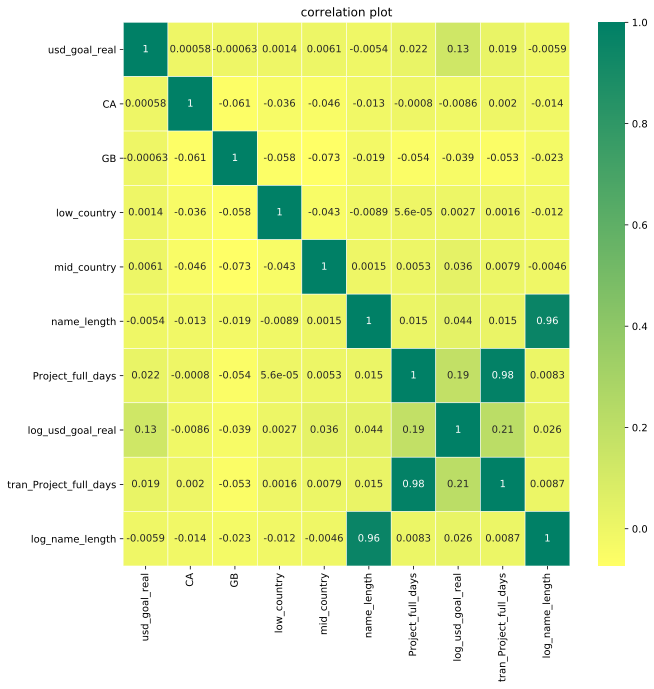

In [32]:
show=heatmap_run(df.corr(),10,10,'summer_r')
show

$\text{As expected the following are highly correlated, name_length and log_name_length  ,tran_Project_full_days and Project_full_days.}$
$\text{We only keep these for future use in training EDA.}$ 
$\text{Also, we will scale the data in the training set, to allow for clear EDA.}$
#### $\text{We will first create a training and a test set, but we want to have a vaildation set as well.}$
#### $\text{So we will split the training set again to create a training and a vaildation set.}$

## $\text{Thus making    70% training , 10% vaildation , 20% test}$


In [33]:
from sklearn.model_selection import train_test_split 
x_maxtrain,x_test,y_maxtrain,y_test=train_test_split(df,y_response,test_size=0.2,random_state=42,stratify=y_response)

x_train,x_vaild,y_train,y_vaild=train_test_split(x_maxtrain,y_maxtrain,test_size=0.125,random_state=42,stratify=y_maxtrain)

$\text{Lets first compute the proportion. Then come up with a proportion confidence interval.}$

In [34]:
def barplots_freq(dat1,title1,xlab1):
    %matplotlib inline
    %config InlineBackend.figure_format='svg'
    dat1.value_counts(dropna=False).head().plot(kind='bar',title=title1)
    _=plt.ylabel('freq count')
    _=plt.xlabel(xlab1)
    
    return plt.show()

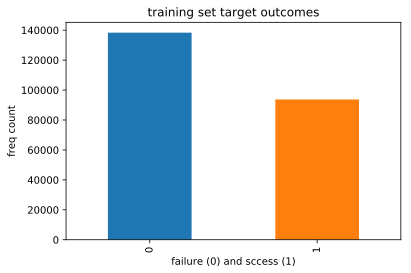

In [35]:
show=barplots_freq(y_train.successful,'training set target outcomes','failure (0) and sccess (1)')
show

In [36]:
y_train.successful.value_counts(dropna=False).head()

0    138326
1     93696
Name: successful, dtype: int64

$$\text{Error Marign}=\text{confidence z score}\times\sqrt{    \frac{\text{estimated maximized  proportion} \times \text{(1-estimated maximized  proportion)}}{\text{sample size}}} $$

$$\text{0.0019965061  Error Margin}=\text{1.96}\times\sqrt{\frac{\text{0.4038} \times \text{(1-0.4038)}}{\text{232022}}} $$

$\text{With an error margin of roughly 0.002 we are 95% confident that the response proportion of sucessful outcomes is 40.38%}$

$\text{This is pretty good news, since we really want to know how well are training model reflex real the true proportion.}$

$\text{Lets now run some exploratory data analysis along with some possible transformations/ tuning of the training set}$

$\text{* Ideally we want to conduct all of our modeling tuning in the training set.}$

$\text{* Preprocessing sometimes forces use to have to apply some exploratory analysis in order to clean the data for proper modeling.}$

$\text{Almost forgot about the categorical variables, lets tansform them and come up with two new predictors.}$

$\text{The new predictors will be called 'weak_fav'and 'strong_fav', the other will be called transformed into hated}$
$\text{All categories  greater than 50% but less than 60% success rate in the training will be cluster into 'weak_fav'}$
$\text{Categories at or greater than 60% will be cluster into 'strong_fav.}$

$\text{Then we will drop the dummy variable hated.}$

In [37]:
deep=y_train.groupby(x_train.category).mean()
weak_fav_list=deep[(deep>.50) & (deep<.60)]
strong_fav_list=deep[deep>=.60]
weak_fav_list=weak_fav_list.dropna()
strong_fav_list=strong_fav_list.dropna()
weak_fav_list=pd.DataFrame(weak_fav_list)
strong_fav_list=pd.DataFrame(strong_fav_list)
weak_fav_list.reset_index(inplace=True)
strong_fav_list.reset_index(inplace=True)
print('weak_fav\n',weak_fav_list)
print('\nstrong_fav\n',strong_fav_list)


weak_fav
              category  successful
0           Art Books    0.546784
1    Camera Equipment    0.524590
2              Comics    0.540075
3     DIY Electronics    0.527728
4           Festivals    0.588235
5      Graphic Novels    0.594142
6        Illustration    0.563394
7           Immersive    0.542222
8       Installations    0.546926
9   Literary Journals    0.564706
10              Music    0.510641
11            Musical    0.560068
12                Pop    0.503915
13         Public Art    0.550523
14               Punk    0.535000
15               Rock    0.565237
16             Shorts    0.588375
17          Webcomics    0.571429
18              Zines    0.506224

strong_fav
            category  successful
0       Anthologies    0.700587
1          Chiptune    0.800000
2   Classical Music    0.667057
3       Comic Books    0.651927
4    Country & Folk    0.674286
5             Dance    0.709127
6        Indie Rock    0.682328
7              Jazz    0.629325
8       L

In [38]:
x_train.category.replace([weak_fav_list.category],'weak_fav',inplace=True)
x_train.category.replace([strong_fav_list.category],'strong_fav',inplace=True)
x_vaild.category.replace([weak_fav_list.category],'weak_fav',inplace=True)
x_vaild.category.replace([strong_fav_list.category],'strong_fav',inplace=True)
x_test.category.replace([weak_fav_list.category],'weak_fav',inplace=True)
x_test.category.replace([strong_fav_list.category],'strong_fav',inplace=True)
xtn=pd.get_dummies(x_train.category)
xtv=pd.get_dummies(x_vaild.category)
xtt=pd.get_dummies(x_test.category)

x_train=pd.concat([x_train,xtn.weak_fav,xtn.strong_fav],axis=1)
x_vaild=pd.concat([x_vaild,xtv.weak_fav,xtv.strong_fav],axis=1)
x_test=pd.concat([x_test,xtt.weak_fav,xtt.strong_fav],axis=1)

x_train.drop('category',axis=1,inplace=True)
x_vaild.drop('category',axis=1,inplace=True)
x_test.drop('category',axis=1,inplace=True)

In [39]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232022 entries, 122904 to 202215
Data columns (total 14 columns):
country                   232022 non-null object
usd_goal_real             232022 non-null float64
Mod_country               232022 non-null object
CA                        232022 non-null uint8
GB                        232022 non-null uint8
low_country               232022 non-null uint8
mid_country               232022 non-null uint8
name_length               232022 non-null int64
Project_full_days         232022 non-null int64
log_usd_goal_real         232022 non-null float64
tran_Project_full_days    232022 non-null float64
log_name_length           232022 non-null float64
weak_fav                  232022 non-null uint8
strong_fav                232022 non-null uint8
dtypes: float64(4), int64(2), object(2), uint8(6)
memory usage: 17.3+ MB


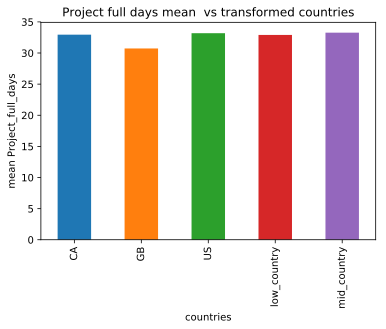

In [40]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
x_train.groupby('Mod_country').Project_full_days.mean().plot(kind='bar',title='Project full days mean  vs transformed countries')
plt.ylabel('mean Project_full_days')
plt.xlabel('countries')
plt.show()

$\text{Looks like the mean average days length of a project was roughy 31 to 34 days, interesting but not immediately useful.}$

In [41]:
pd.crosstab(x_train.Mod_country,x_train.weak_fav)

weak_fav,0,1
Mod_country,,
CA,7663,1032
GB,17521,3245
US,151920,30819
low_country,6781,814
mid_country,11150,1077


$\text{Very interesting that none of the countries have a high rate of the 'weak fav' in the traing set.}$

In [42]:
pd.crosstab(x_train.Mod_country,x_train.strong_fav)

strong_fav,0,1
Mod_country,,
CA,7922,773
GB,18234,2532
US,159335,23404
low_country,7029,566
mid_country,11404,823


$\text{We can see that none of the countries have a high rate of strong  fav in the training set .}$

In [43]:
y=pd.DataFrame(y_train)
pd.crosstab(x_train.Mod_country,[x_train.weak_fav,y.successful])

weak_fav         0             1       
successful       0      1      0      1
Mod_country                            
CA            5289   2374    512    520
GB           10846   6675   1416   1829
US           92678  59242  13657  17162
low_country   4739   2042    459    355
mid_country   8108   3042    622    455

$\text{Low and min country yield an unexpected low rate of sucess from the 'weak fav' categories.}$
$\text{The interaction between 'weak fav' and 'CA'  or 'GB' may yeild some interesting effects in our predictive models.}$
$\text{Although most likely the effect of such interactions would be still be weak.}$

In [44]:
y=pd.DataFrame(y_train)
pd.crosstab(x_train.Mod_country,[x_train.strong_fav,y.successful])

strong_fav       0            1       
successful       0      1     0      1
Mod_country                           
CA            5475   2447   326    447
GB           11510   6724   752   1780
US           98676  60659  7659  15745
low_country   4961   2068   237    329
mid_country   8392   3012   338    485

$\text{Seems like CA or GA mix with strong_fav could be interesting.}$
$\text{The GA:strong_fav being more of a favorite pick to check out.}$

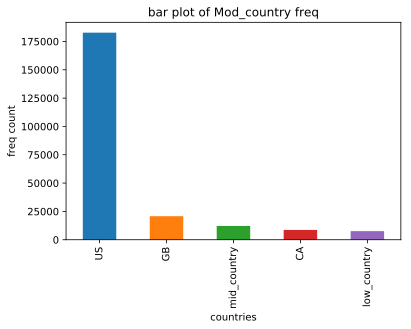

In [45]:
show=barplots_freq(x_train.Mod_country,'bar plot of Mod_country freq','countries')
show

$\text{Thankfuly we made US the dummy base , so it will create (hopefuly) a really good model.}$
$\text{We can see that GB is the second most seen Mod_country, where as low_country is least seen}$
$\text{An interesting idea would have been to cluster the data by continents, but we would have ran into low freq in Asia and Australia}$
$\text{Not to suprisingly, North America over shadowed Europe as well.}$

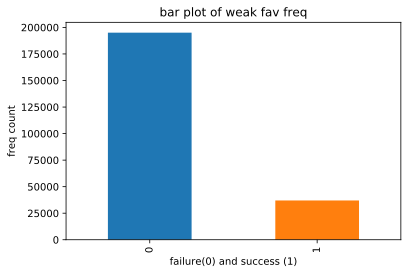

In [46]:
show=barplots_freq(x_train.weak_fav,'bar plot of weak fav freq','failure(0) and success (1)')
show

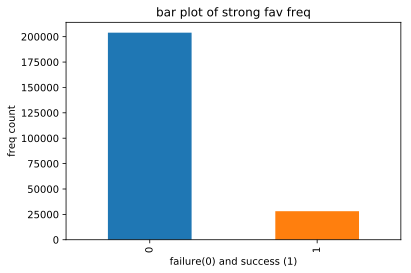

In [47]:
show=barplots_freq(x_train.strong_fav,'bar plot of strong fav freq','failure(0) and success (1)')
show

$\text{Looks like our favorite categories show up in the training set less than half of the time.}$

In [48]:
def mean_plots(dat1,dat2,title1,tl,color1,fig1,fig2,ba):
    dat1.groupby(dat2).mean().plot(kind=ba,figsize=(fig1,fig2), title=title1,color=color1)
    plt.xlabel(tl)
    return plt.show()

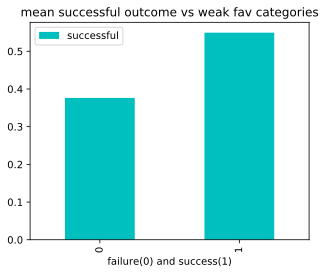

In [49]:
show=mean_plots(y_train,x_train.weak_fav,'mean successful outcome vs weak fav categories','failure(0) and success(1)','c',5,4,'bar')
show

$\text{We expected fav to have a high rate of success in its true placements}$
$\text{Seems like fav may be a useful predictor, since its Falses yield roughly 40% success.}$

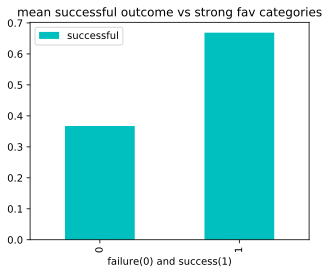

In [50]:
show=mean_plots(y_train,x_train.strong_fav,'mean successful outcome vs strong fav categories','failure(0) and success(1)','c',5,4,'bar')
show

$\text{We expected fav to have a high rate of success in its true placements}$
$\text{Seems like fav may be a useful predictor, since its Falses yield roughly 40% success.}$

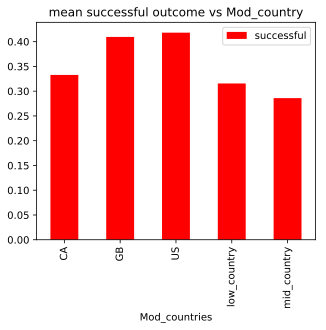

In [51]:
show=mean_plots(y_train,x_train.Mod_country,'mean successful outcome vs Mod_country','Mod_countries','r',5,4,'bar')
show

$\text{Looks like mid_country has a really low rate of successful outcomes, this maybe a good predictor.}$
$\text{Lets dig deep to view possible future combinations/clusters.}$

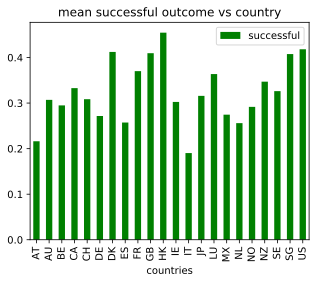

In [52]:
show=mean_plots(y_train,x_train.country,'mean successful outcome vs country','countries','g',5,4,'bar')
show

$\text{Looks like IT and AT have really low rates of success, where as HK has a really high rate of success.}$
$\text{China/Hong Kong seems (from the training set) to be good places to do a kickstarter project.}$
$\text{Although , its interesting that the chance of sucess really isn't high for any single country.}$
$\text{*This is a really good fact to notice, since we didn't know if my method of clustering caused low success rates.}$

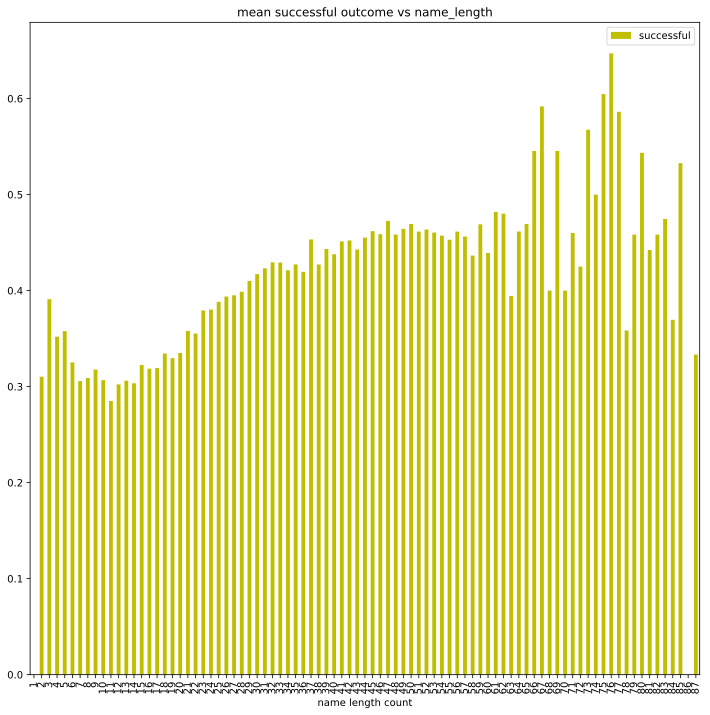

In [53]:
show=mean_plots(y_train,x_train.name_length,'mean successful outcome vs name_length','name length count','y',12,12,'bar')
show

$\text{Name length seems to be a suprisingly interesting predictor. }$

$\text{There seems to be some kind of trend which goes against my ealier bias stattement.}$
$\text{I really thought the success rate would drop as the length increased.}$

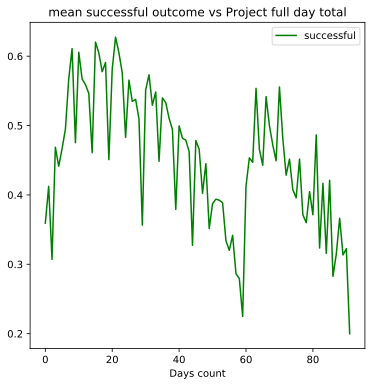

In [54]:
show=mean_plots(y_train,x_train.Project_full_days,'mean successful outcome vs Project full day total','Days count','g',6,6,'line')
show

$\text{The length of the project seems to really make a difference.}$
$\text{Althhough, that difference is not a well defined drop, we can see somewhat of a neagtive trend past 21 to 23 days.}$
$\text{Lets now check out some summary statistics before ploting some scatter plots and box plots for possible outliers.}$

In [55]:
x_train.describe()

,usd_goal_real,CA,GB,low_country,mid_country,name_length,Project_full_days,log_usd_goal_real,tran_Project_full_days,log_name_length,weak_fav,strong_fav
count,2.320220e+05,232022.000000,232022.000000,232022.000000,232022.000000,232022.000000,232022.000000,232022.000000,232022.000000,232022.000000,232022.000000,232022.000000
mean,4.300193e+04,0.037475,0.089500,0.032734,0.052698,34.272125,32.953724,8.583676,5.638310,3.396468,0.159412,0.121101
std,1.180269e+06,0.189923,0.285465,0.177940,0.223430,15.983970,12.707103,1.675832,1.078510,0.568859,0.366060,0.326245
min,1.000000e-02,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-4.605170,0.000000,0.000000,0.000000,0.000000
25%,2.000000e+03,0.000000,0.000000,0.000000,0.000000,21.000000,29.000000,7.600902,5.385165,3.044522,0.000000,0.000000
50%,5.000000e+03,0.000000,0.000000,0.000000,0.000000,33.000000,29.000000,8.517193,5.385165,3.496508,0.000000,0.000000
75%,1.500000e+04,0.000000,0.000000,0.000000,0.000000,48.000000,35.000000,9.615805,5.916080,3.871201,0.000000,0.000000
max,1.663614e+08,1.000000,1.000000,1.000000,1.000000,87.000000,91.000000,18.929673,9.539392,4.465908,1.000000,1.000000


$\text{Looks like I need to apply a scaler and drop some of my predictors (The ones used for deeper EDA).}$

$\text{Lets first run some  boxplots and cut out some outliers.}$

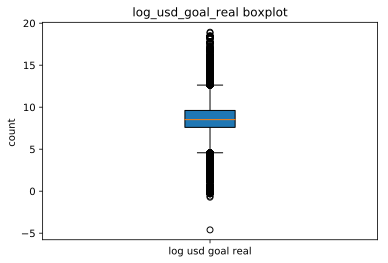

In [56]:
%matplotlib inline
%config InlineBacked.figure_format='svg'
_=plt.boxplot(x_train.log_usd_goal_real,patch_artist=True,labels=['log usd goal real'])
_=plt.ylabel('count ')
_=plt.title('log_usd_goal_real boxplot')
plt.show()

$\text{Lets drop our extreme values.}$

In [57]:
y_train=pd.DataFrame(y_train)
x_train=pd.concat([y_train,x_train],axis=1)
x_train=x_train[x_train.log_usd_goal_real>0]
x_train.reset_index(drop=True,inplace=True)
x_train=x_train.dropna()
y_train=x_train.iloc[:,0]
x_train=x_train.drop('successful',axis=1)

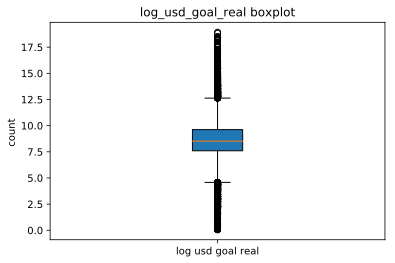

In [58]:
%matplotlib inline
%config InlineBacked.figure_format='svg'
_=plt.boxplot(x_train.log_usd_goal_real,patch_artist=True,labels=['log usd goal real'])
_=plt.ylabel('count ')
_=plt.title('log_usd_goal_real boxplot')
plt.show()

In [59]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231800 entries, 0 to 231799
Data columns (total 14 columns):
country                   231800 non-null object
usd_goal_real             231800 non-null float64
Mod_country               231800 non-null object
CA                        231800 non-null uint8
GB                        231800 non-null uint8
low_country               231800 non-null uint8
mid_country               231800 non-null uint8
name_length               231800 non-null int64
Project_full_days         231800 non-null int64
log_usd_goal_real         231800 non-null float64
tran_Project_full_days    231800 non-null float64
log_name_length           231800 non-null float64
weak_fav                  231800 non-null uint8
strong_fav                231800 non-null uint8
dtypes: float64(4), int64(2), object(2), uint8(6)
memory usage: 17.2+ MB


In [60]:
x_trainEDA=x_train.copy(deep=False)
x_vaildEDA=x_vaild.copy(deep=False)
x_testEDA=x_test.copy(deep=False)
x_train=x_train.drop(['Project_full_days','usd_goal_real','name_length','country','Mod_country'],axis=1)
x_vaild=x_vaild.drop(['Project_full_days','usd_goal_real','name_length','country','Mod_country'],axis=1)
x_test=x_test.drop(['Project_full_days','usd_goal_real','name_length','country','Mod_country'],axis=1)


In [61]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231800 entries, 0 to 231799
Data columns (total 9 columns):
CA                        231800 non-null uint8
GB                        231800 non-null uint8
low_country               231800 non-null uint8
mid_country               231800 non-null uint8
log_usd_goal_real         231800 non-null float64
tran_Project_full_days    231800 non-null float64
log_name_length           231800 non-null float64
weak_fav                  231800 non-null uint8
strong_fav                231800 non-null uint8
dtypes: float64(3), uint8(6)
memory usage: 8.4 MB


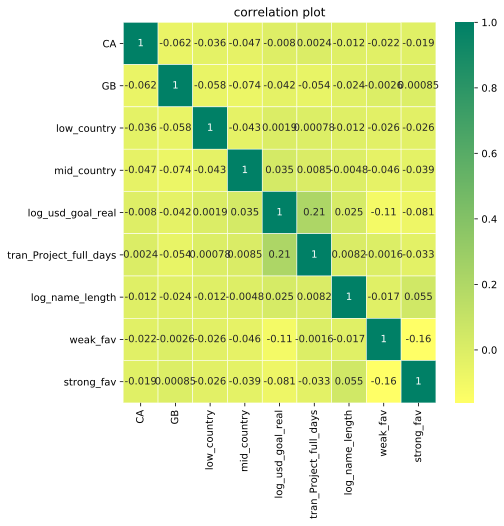

In [99]:
show=heatmap_run(x_train.corr(),7,7,'summer_r')
show

In [63]:
x_train.describe()

,CA,GB,low_country,mid_country,log_usd_goal_real,tran_Project_full_days,log_name_length,weak_fav,strong_fav
count,231800.000000,231800.000000,231800.000000,231800.000000,231800.000000,231800.000000,231800.000000,231800.000000,231800.000000
mean,0.037455,0.089586,0.032748,0.052731,8.591942,5.638782,3.396421,0.159353,0.121048
std,0.189874,0.285588,0.177977,0.223496,1.655169,1.077835,0.568934,0.366006,0.326184
min,0.000000,0.000000,0.000000,0.000000,0.039221,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.600902,5.385165,3.044522,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,8.517193,5.385165,3.496508,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,9.615805,5.916080,3.871201,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,18.929673,9.539392,4.465908,1.000000,1.000000


In [64]:
x_vaild.describe()

,CA,GB,low_country,mid_country,log_usd_goal_real,tran_Project_full_days,log_name_length,weak_fav,strong_fav
count,33147.000000,33147.000000,33147.000000,33147.000000,33147.000000,33147.000000,33147.000000,33147.000000,33147.000000
mean,0.036715,0.086946,0.032914,0.050231,8.583843,5.636548,3.394345,0.157842,0.123872
std,0.188065,0.281760,0.178414,0.218424,1.674440,1.076432,0.571566,0.364599,0.329441
min,0.000000,0.000000,0.000000,0.000000,-0.261365,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.600902,5.385165,3.044522,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,8.517193,5.385165,3.496508,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,9.615805,5.916080,3.871201,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,18.491790,9.539392,4.454347,1.000000,1.000000


In [65]:
x_test.describe()

,CA,GB,low_country,mid_country,log_usd_goal_real,tran_Project_full_days,log_name_length,weak_fav,strong_fav
count,66293.000000,66293.000000,66293.000000,66293.000000,66293.000000,66293.000000,66293.000000,66293.000000,66293.000000
mean,0.037078,0.087566,0.033835,0.052193,8.570174,5.640292,3.394881,0.156638,0.119409
std,0.188954,0.282665,0.180805,0.222417,1.665697,1.082476,0.569933,0.363462,0.324272
min,0.000000,0.000000,0.000000,0.000000,-1.897120,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.600902,5.385165,3.044522,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,8.517193,5.385165,3.496508,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,9.615805,5.916080,3.871201,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,18.420681,9.539392,4.465908,1.000000,1.000000


$\text{Now lets apply a MinMaxScaler to our data set.}$

$\text{We will fit the scaler to the training set, then apply a transformation on all three sets.}$

$\text{So the vaildation and test set may be great or less than the range of the training set.}$

$\text{Although , they will be scaled down to match very closely to the training set.}$

$\text{We wouldn't want multiple different values to equal the max or min value.}$

In [66]:
from sklearn.preprocessing import MinMaxScaler
scal=MinMaxScaler()
da=scal.fit_transform(x_train)
x_trains=pd.DataFrame(da,columns=x_train.columns)
dav=scal.transform(x_vaild)
x_vailds=pd.DataFrame(dav,columns=x_vaild.columns)
dats=scal.transform(x_test)
x_tests=pd.DataFrame(dats,columns=x_test.columns)

In [67]:
x_trains.describe()

,CA,GB,low_country,mid_country,log_usd_goal_real,tran_Project_full_days,log_name_length,weak_fav,strong_fav
count,231800.000000,231800.000000,231800.000000,231800.000000,231800.000000,231800.000000,231800.000000,231800.000000,231800.000000
mean,0.037455,0.089586,0.032748,0.052731,0.452754,0.591105,0.760522,0.159353,0.121048
std,0.189874,0.285588,0.177977,0.223496,0.087619,0.112988,0.127395,0.366006,0.326184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.400291,0.564519,0.681725,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.448797,0.564519,0.782933,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.506954,0.620174,0.866834,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
x_vailds.describe()

,CA,GB,low_country,mid_country,log_usd_goal_real,tran_Project_full_days,log_name_length,weak_fav,strong_fav
count,33147.000000,33147.000000,33147.000000,33147.000000,33147.000000,33147.000000,33147.000000,33147.000000,33147.000000
mean,0.036715,0.086946,0.032914,0.050231,0.452325,0.590871,0.760057,0.157842,0.123872
std,0.188065,0.281760,0.178414,0.218424,0.088639,0.112841,0.127984,0.364599,0.329441
min,0.000000,0.000000,0.000000,0.000000,-0.015912,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.400291,0.564519,0.681725,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.448797,0.564519,0.782933,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.506954,0.620174,0.866834,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,0.976820,1.000000,0.997411,1.000000,1.000000


$\text{Notice that some of the variables have lower or higher min and max values, this is to be expected.}$
$\text{If they were forced to 0 or 1 , then we would have multipe numbers being ranged as 0 or 1, which isn't good for predictive modeling.}$

In [69]:
x_tests.describe()

,CA,GB,low_country,mid_country,log_usd_goal_real,tran_Project_full_days,log_name_length,weak_fav,strong_fav
count,66293.000000,66293.000000,66293.000000,66293.000000,66293.000000,66293.000000,66293.000000,66293.000000,66293.000000
mean,0.037078,0.087566,0.033835,0.052193,0.451601,0.591263,0.760177,0.156638,0.119409
std,0.188954,0.282665,0.180805,0.222417,0.088177,0.113474,0.127619,0.363462,0.324272
min,0.000000,0.000000,0.000000,0.000000,-0.102504,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.400291,0.564519,0.681725,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.448797,0.564519,0.782933,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.506954,0.620174,0.866834,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,0.973056,1.000000,1.000000,1.000000,1.000000


$\text{Now lets start our predictive modeling methods.}$

## Are one-way ANOVA F test assumptions met?
$\text{Assumptions of one-way ANOVA F test:}$

$\text{1._ Independent samples/observations ?}$
$\text{Checked, via  design/ random split}$

$\text{2._ Normal  Distributions response variables in samples?}$
$\text{We got large samples , so we will say its good, plus we transformed all of the non catogrical variables, other than dates to be closly normalized.}$

$\text{3._ Equal/same population variances in all samples (homogeneity of variances)?}$
$\text{We can check for homogeneity of variance by plotting the predcted values and residuals via scatter plot.}$
$\text{Although not required for logistic models.}$

$\text{We don't known anything about the population variance before hand.}$


# Starting  off with classification method: Binary logistic Regression

$\text{Lets start off by deteriming the base accuracy of success and failure in the training set.}$

In [70]:
print(x_trains.shape ,x_vailds.shape,x_tests.shape)

(231800, 9) (33147, 9) (66293, 9)


In [71]:
base_success=pd.DataFrame(np.ones(231800))
base_failure=pd.DataFrame(np.zeros(231800))
from sklearn.metrics import accuracy_score
print('Base accuracy of success in training set',accuracy_score(y_train,base_success))
print('Base accuracy of failure in training set',accuracy_score(y_train,base_failure))

Base accuracy of success in training set 0.40336496980155306
Base accuracy of failure in training set 0.596635030198447


$\text{So roughly we have 40% success vs 60% failure rates, in the training set.}$

In [72]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

AreaUderCurve=roc_auc_score(y_train,base_success)
print('The Area Under the Curve base rate of the ROC for base model',AreaUderCurve)
print(classification_report(y_train,base_success))

The Area Under the Curve base rate of the ROC for base model 0.5
             precision    recall  f1-score   support

          0       0.00      0.00      0.00    138300
          1       0.40      1.00      0.57     93500

avg / total       0.16      0.40      0.23    231800



C:\Users\dragon\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


$\text{The Area under the curve for the receiver operating charatistic curve was found to be 0.5 or 50%}$

$\text{ Ideally , we want an Area of 1 or 100% in the ROC curve, this will allow for the greatest true positive rating and lowest False positive rating}$

$\text{With an AUC of 0.5, we  find that the true postive rating and false positive rating match}$

$\text{ This concept can be confusing , when the data isn't split 50/50, thus the precision scores will showcase one of the attriutes full true amount , when the AUC is 0.5}$

$\text{Typically changing the threshold is done as a last attempt method after conducting some models.}$

### $\text{Although, changinig the threshold creates bias, so I will not do it.}$

$\text{There are situation where such a thing would be done, but this isn't one of those times.}$

$\text{Its good to note  the effects of changing the threshold has a recipoical effect on the sensitivity and specificity of the two outcomes.}$

$\text{Lets build a better model than the null model !}$

$\text{Lets first reduce our predictors by way of ANOVA F test}$

$\text{I created a function for applying and changing the various data sets base off of ANOVA F test.}$

$\text{Lets first try out the saturated model using all 9 predictors.}$

$\text{Then we will try reducing the model to find a better model with less features.}$

In [73]:
from sklearn.feature_selection import SelectPercentile,f_classif
def select_percentile_f(dat,p,dat2,dat3):
    msect=SelectPercentile(f_classif,p)
    msect.fit(dat,y_train)
    x=pd.DataFrame(msect.pvalues_,dat.columns)
    x.columns=['pvalues']
    x=np.transpose(x)
    picked_pvalues=x[x.columns[msect.get_support(indices=True)]]
    y=pd.DataFrame(msect.scores_,dat.columns)
    y.columns=['scores']
    y=np.transpose(y)
    picked_scores=y[y.columns[msect.get_support(indices=True)]]
    
    return [ dat[dat.columns[msect.get_support(indices=True)]],picked_pvalues,picked_scores,dat2[dat2.columns[msect.get_support(indices=True)]],dat3[dat3.columns[msect.get_support(indices=True)]]]

In [74]:
m_traindate,pick_pvalues,pick_scores,x_v,x_t=select_percentile_f(x_trains,100.0,x_vailds,x_tests)
print(pick_pvalues)
print('\n\nThe F test scores for the picked:')
print(pick_scores)

                   CA        GB   low_country    mid_country  \
pvalues  2.349039e-43  0.058289  4.768653e-57  1.644011e-163   

         log_usd_goal_real  tran_Project_full_days  log_name_length  weak_fav  \
pvalues                0.0                     0.0              0.0       0.0   

         strong_fav  
pvalues         0.0  


The F test scores for the picked:
                CA        GB  low_country  mid_country  log_usd_goal_real  \
scores  190.680972  3.585442   253.515377   743.776402       12177.603098   

        tran_Project_full_days  log_name_length     weak_fav   strong_fav  
scores             3225.442886      2726.310961  3929.323064  9689.762609  


$\text{From the p values we see that we have some good predictors, lets form our saturated model!}$
$\text{We will try a various combinations, while trying to create the best model with the fewest features after viewing the saturated model.}$

$\text{We will fine tune all of our models via grid search cross vaildation with different parameters per grid space.}$

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
pramer_grid={'C':np.logspace(0,4,10)}
blogrg=LogisticRegression(penalty='l2')

## notice we are doing kfold cv for the hypermeter 
blogrg_cv1=GridSearchCV(blogrg,pramer_grid,cv=10)

In [76]:
##trained on the sub training set and created a algorthim set via blogrg
blogrg_cv1.fit(m_traindate,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e+00, 2.78256e+00, 7.74264e+00, 2.15443e+01, 5.99484e+01,
       1.66810e+02, 4.64159e+02, 1.29155e+03, 3.59381e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

$\text{Lets make some functions that will greatly reduce our coding for checking out various models.}$

In [77]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,roc_auc_score
from sklearn.metrics import roc_curve

def vaildmodel_reviews(fitter,modelv,title1):
    ##  make prediction on the vaidation response with the vaidlation predictor set 
    y_pred1=fitter.predict(x_v)
    y_hat=fitter.predict_proba(x_v)[:,1]
    print('Computing the confusion_matrix for the fitted train model used on vaildation predictors.\n')
    print(confusion_matrix(y_vaild,y_pred1))
    ##accuracy=(tp+tn)/(tp+tn+fp+fn)
    ##precision=tp/(tp+fp)
    ## recall=sensitifity=hit.rate=truepostive rate=tp/(tp+fn)
    ##F1 score=2*(precision*recall)/(precision+recall)
    ##High recall means high correct prediction
    print('\nClassification Report for prediction on y_vaild\n')
    print(classification_report(y_vaild,y_pred1))
    print("The Area under the Curve is:",roc_auc_score(y_vaild,y_hat))
    ## note  .predict__proba() returns two arrays 
    ## the first column probability of the predictive labels being failure
    ## the second column probability ot the predictive labels being successful
    print('\n\nComputing the ROC curve')
    print('\n Shows how well the model works with different thresholds.\n Ploting the ROC curve from y_vaild.')
    
    F_postive_r , T_postive_r, thresholds=roc_curve(y_vaild,y_hat)

    _=plt.figure()
    _=plt.plot([0,1],[0,1],'--')
    _=plt.plot(F_postive_r,T_postive_r, label=modelv)
    _=plt.xlabel('False positive rate')
    _=plt.ylabel('True positive rate')
    _=plt.title(title1)
    ## showing thresholds on plot!!
    ## gca()  gets current axes instance on plot
    ## twinx() creates a twin axes with an invisible x axis
    k=plt.gca().twinx()
    k.plot(F_postive_r,thresholds,linestyle='-.',color='g')
    k.set_ylabel('Thresholds',color='g')
    plt.show()
    
    return ;
def testmodel_reviews(fitter,modelt,title1):
    ## make prediction on the test response with the training model 
    y_pred=fitter.predict(x_t)
    y_hat2=fitter.predict_proba(x_t)[:,1]

    print('Computing the confusion_matrix for the fitted train model used on test predictors')
    print('\nShows how well the train fit works on the test set via accuracy chart and Area under the ROC')
    print(confusion_matrix(y_test,y_pred))
    print('The area under the curve rate is:',roc_auc_score(y_test,y_hat2))

    print('\n\nComputing the ROC curve')
    print('\n Shows how well the model fits for different thresholds).')
    print('\n True  postive rate vs False postive rate.')
    print('\n Ploting the ROC curve from y_test ,y_hat_2.')
    F_postive_r , T_postive_r, thresholds=roc_curve(y_test,y_hat2)
    _=plt.figure()
    _=plt.plot([0,1],[0,1],'--')
    _=plt.plot(F_postive_r,T_postive_r, label=modelt)
    _=plt.xlabel('False positive rate')
    _=plt.ylabel('True positive rate')
    _=plt.title(title1)
    k=plt.gca().twinx()
    k.plot(F_postive_r,thresholds,linestyle='-.',color='g')
    k.set_ylabel('Thresholds',color='g')
    plt.show()
    print('The area under the curve rate is:',roc_auc_score(y_test,y_hat2))

    print('\nClassification Report for prediction on y_test\n')
    print(classification_report(y_test,y_pred))
    
    return;

Computing the confusion_matrix for the fitted train model used on vaildation predictors.

[[16261  3501]
 [ 7520  5865]]

Classification Report for prediction on y_vaild

             precision    recall  f1-score   support

          0       0.68      0.82      0.75     19762
          1       0.63      0.44      0.52     13385

avg / total       0.66      0.67      0.65     33147

The Area under the Curve is: 0.694409056112906


Computing the ROC curve

 Shows how well the model works with different thresholds.
 Ploting the ROC curve from y_vaild.


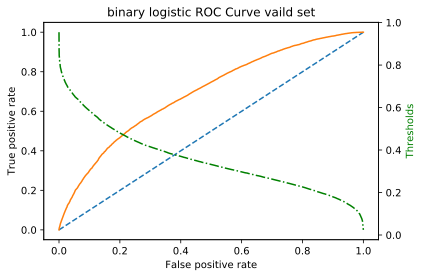

In [78]:
vaildmodel_reviews(blogrg_cv1,'logistic','binary logistic ROC Curve vaild set')

#### $\text{ The saturuated vaildation model yields an AUC of 69.44% which is better than an AUC of area of 50%  but its still a poor model.}$
$\text{The blue line shows the effect of the null model , I first created.}$

$\text{As I mention before, the blue line increases evenly, thus its not a great model.}$

$\text{For every true postive rate we have the same False positve rate}$

$\text{In such a case the precision will make only one of true %  in the data set}$

$\text{We really want a model that has a higher true postive rate with a lower false positive rate.}$

Computing the confusion_matrix for the fitted train model used on test predictors

Shows how well the train fit works on the test set via accuracy chart and Area under the ROC
[[32642  6881]
 [15444 11326]]
The area under the curve rate is: 0.6972906802487804


Computing the ROC curve

 Shows how well the model fits for different thresholds).

 True  postive rate vs False postive rate.

 Ploting the ROC curve from y_test ,y_hat_2.


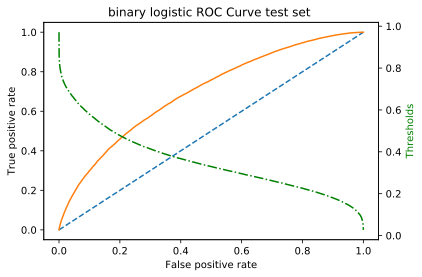

The area under the curve rate is: 0.6972906802487804

Classification Report for prediction on y_test

             precision    recall  f1-score   support

          0       0.68      0.83      0.75     39523
          1       0.62      0.42      0.50     26770

avg / total       0.66      0.66      0.65     66293



In [79]:
testmodel_reviews(blogrg_cv1,'logistic','binary logistic ROC Curve test set ')

$\text{Not much has changed from the vaildation set, the Area under the curve rate is roughly 69.729%}$
$\text{specifity in test model =62.206%  , sensitivity in test model=67.878%}$
$\text{Now that we have seen the effects of the null and the saturated models, lets search for something inbetween thats better.}$
$\text{Lets first try out cominations of the features with a ANOVA p value of zero for the ANOVA test.}$
$\text{The best combination based off feature ANOVA p values is seen below.}$

In [80]:
m_traindate,pick_pvalues,pick_scores,x_v,x_t=select_percentile_f(x_trains,55.6,x_vailds,x_tests)
print('\nThe picked pvalues:\n\n')
print(pick_pvalues)


The picked pvalues:


         log_usd_goal_real  tran_Project_full_days  log_name_length  weak_fav  \
pvalues                0.0                     0.0              0.0       0.0   

         strong_fav  
pvalues         0.0  


In [81]:
pramer_grid={'C':np.logspace(0,4,10)}
blogrg=LogisticRegression(penalty='l2')

## notice we are doing kfold cv for the hypermeter 
blogrg_cv2=GridSearchCV(blogrg,pramer_grid,cv=10)
##trained on the sub training set and created a algorthim set via blogrg
blogrg_cv2.fit(m_traindate,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e+00, 2.78256e+00, 7.74264e+00, 2.15443e+01, 5.99484e+01,
       1.66810e+02, 4.64159e+02, 1.29155e+03, 3.59381e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Computing the confusion_matrix for the fitted train model used on vaildation predictors.

[[16303  3459]
 [ 7580  5805]]

Classification Report for prediction on y_vaild

             precision    recall  f1-score   support

          0       0.68      0.82      0.75     19762
          1       0.63      0.43      0.51     13385

avg / total       0.66      0.67      0.65     33147

The Area under the Curve is: 0.6919753811484798


Computing the ROC curve

 Shows how well the model works with different thresholds.
 Ploting the ROC curve from y_vaild.


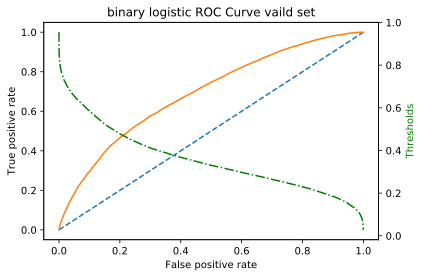

Computing the confusion_matrix for the fitted train model used on test predictors

Shows how well the train fit works on the test set via accuracy chart and Area under the ROC
[[32714  6809]
 [15503 11267]]
The area under the curve rate is: 0.6947858866969938


Computing the ROC curve

 Shows how well the model fits for different thresholds).

 True  postive rate vs False postive rate.

 Ploting the ROC curve from y_test ,y_hat_2.


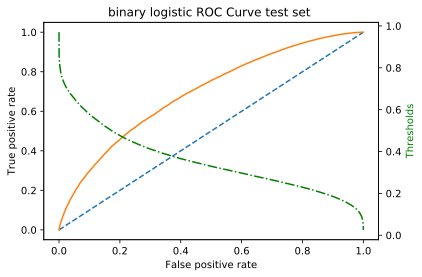

The area under the curve rate is: 0.6947858866969938

Classification Report for prediction on y_test

             precision    recall  f1-score   support

          0       0.68      0.83      0.75     39523
          1       0.62      0.42      0.50     26770

avg / total       0.66      0.66      0.65     66293



In [82]:
vaildmodel_reviews(blogrg_cv2,'logistic','binary logistic ROC Curve vaild set')
testmodel_reviews(blogrg_cv2,'logistic','binary logistic ROC Curve test set ')

$\text{Not a great model, maybe we can do better.}$
$\text{test model AUC 69.479%, sensitivity =67.847% ,specifity=62.33%}$
$\text{Looks like we got roughly the same effect as the satruated model.}$
$\text{Now lets pick our features base off their L2 reduce coefs with a 40% threshold importances from the model.}$
$\text{We can do this by apply modelselct from sklearn.}$

In [83]:
from sklearn.feature_selection import SelectFromModel
 
blogrg=LogisticRegression(penalty='l2')
#40% or more importance in the feature
sm=SelectFromModel(blogrg,threshold=.4)

##trained on the sub training set and created a algorthim set via blogrg
xmodel=sm.fit_transform(x_trains,y_train)

In [84]:
xmodel.shape

(231800, 6)

In [85]:
model=x_trains[x_trains.columns[sm.get_support(indices=True)]]
x_v=x_vailds[x_vailds.columns[sm.get_support(indices=True)]]
x_t=x_tests[x_tests.columns[sm.get_support(indices=True)]]
model.head(1)

,mid_country,log_usd_goal_real,tran_Project_full_days,log_name_length,weak_fav,strong_fav
0,0.0,0.263171,0.513553,0.57434,0.0,1.0


In [86]:
pramer_grid={'C':np.logspace(0,4,10)}
blogrg=LogisticRegression(penalty='l2')

## notice we are doing kfold cv for the hypermeter 
blogrg_cv3=GridSearchCV(blogrg,pramer_grid,cv=10)
##trained on the sub training set and created a algorthim set via blogrg
blogrg_cv3.fit(model,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e+00, 2.78256e+00, 7.74264e+00, 2.15443e+01, 5.99484e+01,
       1.66810e+02, 4.64159e+02, 1.29155e+03, 3.59381e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Computing the confusion_matrix for the fitted train model used on vaildation predictors.

[[16273  3489]
 [ 7560  5825]]

Classification Report for prediction on y_vaild

             precision    recall  f1-score   support

          0       0.68      0.82      0.75     19762
          1       0.63      0.44      0.51     13385

avg / total       0.66      0.67      0.65     33147

The Area under the Curve is: 0.6931008738769088


Computing the ROC curve

 Shows how well the model works with different thresholds.
 Ploting the ROC curve from y_vaild.


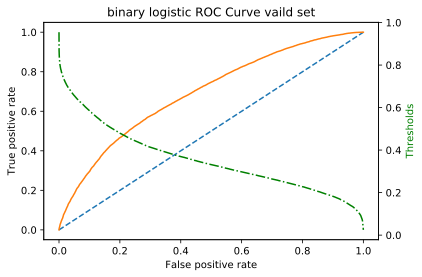

Computing the confusion_matrix for the fitted train model used on test predictors

Shows how well the train fit works on the test set via accuracy chart and Area under the ROC
[[32692  6831]
 [15462 11308]]
The area under the curve rate is: 0.6964338416982244


Computing the ROC curve

 Shows how well the model fits for different thresholds).

 True  postive rate vs False postive rate.

 Ploting the ROC curve from y_test ,y_hat_2.


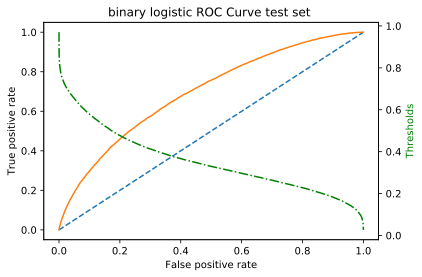

The area under the curve rate is: 0.6964338416982244

Classification Report for prediction on y_test

             precision    recall  f1-score   support

          0       0.68      0.83      0.75     39523
          1       0.62      0.42      0.50     26770

avg / total       0.66      0.66      0.65     66293



In [87]:
vaildmodel_reviews(blogrg_cv3,'logistic','binary logistic ROC Curve vaild set')
testmodel_reviews(blogrg_cv3,'logistic','binary logistic ROC Curve test set ')

#### $\text{Test AUC is 69.64% , sensitivity =67.89%, specifitvity=62.34%}$
$\text{Compared to the saturated model, it has a higher specificity and sensitivity , but lower AUC.}$
$\text{Currently this model is in the lead for best binary logistic regression model for predicting a successful kickstarter project outcome.}$
$\text{Lets try out some interaction terms, that I passively mention before during EDA.}$

In [88]:
x_trains['GB:strong_fav']=x_trains.GB*x_trains.strong_fav
x_vailds['GB:strong_fav']=x_vailds.GB*x_vailds.strong_fav
x_tests['GB:strong_fav']=x_tests.GB*x_tests.strong_fav

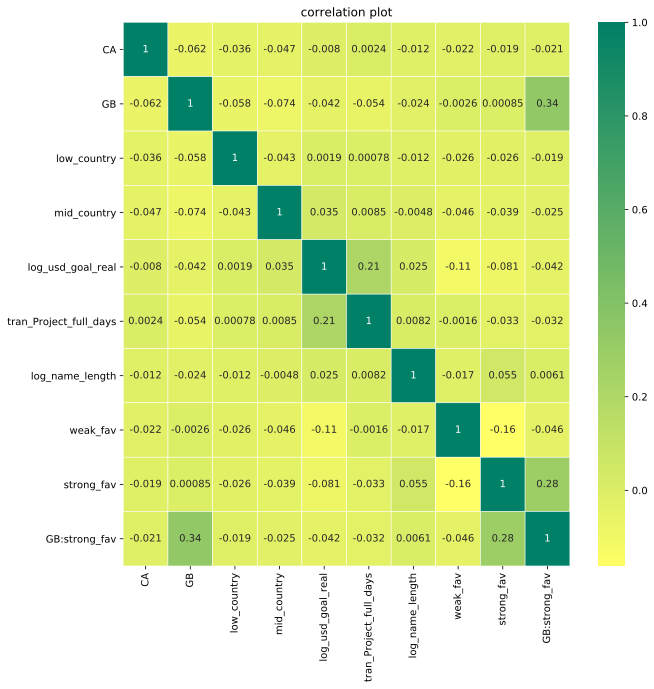

In [89]:
show=heatmap_run(x_trains.corr(),10,10,'summer_r')
show

$\text{We don't see any strongly correlated variables. 0.34 is kind of a med low, so we will allow it.}$
$\text{After trying various combinations with the new interaction term GB:strong_fav, we were unable to improve the model.}$
$\text{The best combination found for the binary logistic regression model for predicting success was with the following predictors:}$

$$\text{ 1.) mid_country   2.) log_usd_goal_real   3.) tran_Project_full_days   4.) log_name_length   5.) weak_fav   6.) strong_fav}$$

$\text{With a test AUC of 69.64% , sensitivity =67.89%,and specifitvity=62.34%}$

$\text{In terms of AUC not as great as the full 9 predictor model, but way better in terms of sensitivity and specifitvity.}$

## $\text{Now lets apply our best predictors to a few different model types and compare results}$

$\text{First off , lets try a RandomForest}$
$\text{Background information on model}$

In [90]:
from sklearn.feature_selection import SelectFromModel
 
blogrg=LogisticRegression(penalty='l2')
#40% or more importance in the feature
sm=SelectFromModel(blogrg,threshold=.4)

##trained on the sub training set and created a algorthim set via blogrg
xmodel=sm.fit_transform(x_trains,y_train)

model=x_trains[x_trains.columns[sm.get_support(indices=True)]]
x_v=x_vailds[x_vailds.columns[sm.get_support(indices=True)]]
x_t=x_tests[x_tests.columns[sm.get_support(indices=True)]]
model.head(1)

,mid_country,log_usd_goal_real,tran_Project_full_days,log_name_length,weak_fav,strong_fav
0,0.0,0.263171,0.513553,0.57434,0.0,1.0


In [91]:
from sklearn.ensemble import RandomForestClassifier
ranfor=RandomForestClassifier(max_depth=2,n_estimators=20,random_state=42,criterion='gini')
ranfor.fit(model,y_train)
traintt=pd.DataFrame((ranfor.feature_importances_).reshape(1,6),columns=model.columns)
print('Feature that are important from the 6 predictors from fitted training model:')
print('All the non important features out of the 6  predictors are not listed below')
traintt=traintt.loc[:,(traintt !=0).any(axis=0)]
traintt

Feature that are important from the 6 predictors from fitted training model:
All the non important features out of the 6  predictors are not listed below


,mid_country,log_usd_goal_real,tran_Project_full_days,log_name_length,weak_fav,strong_fav
0,0.006116,0.284234,0.108441,0.125067,0.266284,0.209858


$\text{So, from the randomForest models, we can see that log_usd_goal_real was the most important feature.}$
$\text{The least important feature is mid_country base off randomforest methods.}$
$\text{Remember that  we got theses values after running 20 different decision trees using the gini criterion.}$
$\text{we could have used a randomforest model to pick our logistic predictors, just saying after the fact.}$


Computing the confusion_matrix for the fitted train model used on vaildation predictors.

[[18080  1682]
 [ 9873  3512]]

Classification Report for prediction on y_vaild

             precision    recall  f1-score   support

          0       0.65      0.91      0.76     19762
          1       0.68      0.26      0.38     13385

avg / total       0.66      0.65      0.60     33147

The Area under the Curve is: 0.6836948291315893


Computing the ROC curve

 Shows how well the model works with different thresholds.
 Ploting the ROC curve from y_vaild.


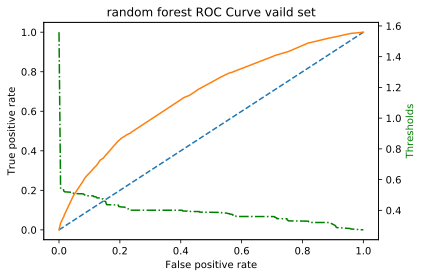

Computing the confusion_matrix for the fitted train model used on test predictors

Shows how well the train fit works on the test set via accuracy chart and Area under the ROC
[[36277  3246]
 [19884  6886]]
The area under the curve rate is: 0.6853096499439039


Computing the ROC curve

 Shows how well the model fits for different thresholds).

 True  postive rate vs False postive rate.

 Ploting the ROC curve from y_test ,y_hat_2.


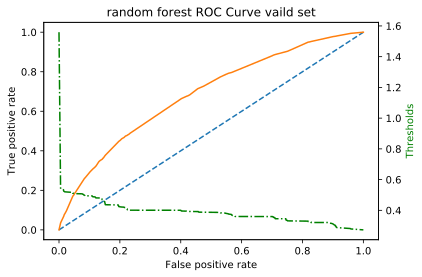

The area under the curve rate is: 0.6853096499439039

Classification Report for prediction on y_test

             precision    recall  f1-score   support

          0       0.65      0.92      0.76     39523
          1       0.68      0.26      0.37     26770

avg / total       0.66      0.65      0.60     66293



In [92]:
vaildmodel_reviews(ranfor,'RandomForest','random forest ROC Curve vaild set')
testmodel_reviews(ranfor,'RandomForest','random forest ROC Curve vaild set')

$\text{Using a randomforest model yeilds a worst model compared to our best binary logistic model.}$
$\text{test model has an AUC of 68.53,sensitivity =64.59% , specificity=67.96%}$
$\text{Lets apply a randomforest model on all the predictors, then find out which predictor is a strong indicater from randomforest methods}$

In [93]:
from sklearn.ensemble import RandomForestClassifier
ranfor=RandomForestClassifier(max_depth=2,n_estimators=20,random_state=42,criterion='gini')
ranfor.fit(x_trains,y_train)
traintt2=pd.DataFrame((ranfor.feature_importances_).reshape(1,10),columns=x_trains.columns)
print('Feature that are important from the 9 predictors from fitted training model:')
print('All the non important features out of the 9 predictors are not listed below')
traintt2=traintt2.loc[:,(traintt2 !=0).any(axis=0)]
traintt2

Feature that are important from the 9 predictors from fitted training model:
All the non important features out of the 9 predictors are not listed below


,CA,GB,low_country,mid_country,log_usd_goal_real,tran_Project_full_days,log_name_length,weak_fav,strong_fav,GB:strong_fav
0,0.000513,0.00006,0.001666,0.012434,0.368149,0.087736,0.049812,0.146231,0.317527,0.015871


## $\text{Lets try a neural network.}$
$\text{Background information on model}$
$\text{Typically consider a black box method, since its hard to explain in great detail the deicisons made inside its hidden layers.}$

In [94]:
blogrg=LogisticRegression(penalty='l2')
#40% or more importance in the feature
sm=SelectFromModel(blogrg,threshold=.4)

##trained on the sub training set and created a algorthim set via blogrg
xmodel=sm.fit_transform(x_trains,y_train)

model=x_trains[x_trains.columns[sm.get_support(indices=True)]]
x_v=x_vailds[x_vailds.columns[sm.get_support(indices=True)]]
x_t=x_tests[x_tests.columns[sm.get_support(indices=True)]]
model.head(1)

,mid_country,log_usd_goal_real,tran_Project_full_days,log_name_length,weak_fav,strong_fav
0,0.0,0.263171,0.513553,0.57434,0.0,1.0


In [95]:
from sklearn.neural_network import MLPClassifier
## rectified linear unit function inside the hidden layers is consider topic pick
## It does some times have issues ,where it creates dead nodes, said node doesn't a useful value
mp=MLPClassifier(solver='lbfgs',random_state=42,activation='relu',hidden_layer_sizes=(4,3))
mp.fit(model,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(4, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Computing the confusion_matrix for the fitted train model used on vaildation predictors.

[[16265  3497]
 [ 7551  5834]]

Classification Report for prediction on y_vaild

             precision    recall  f1-score   support

          0       0.68      0.82      0.75     19762
          1       0.63      0.44      0.51     13385

avg / total       0.66      0.67      0.65     33147

The Area under the Curve is: 0.693093947977193


Computing the ROC curve

 Shows how well the model works with different thresholds.
 Ploting the ROC curve from y_vaild.


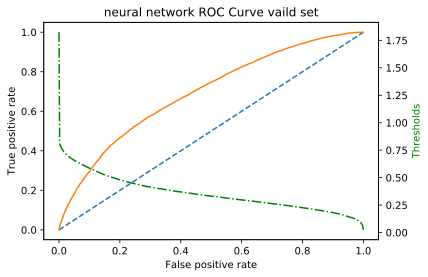

Computing the confusion_matrix for the fitted train model used on test predictors

Shows how well the train fit works on the test set via accuracy chart and Area under the ROC
[[32669  6854]
 [15441 11329]]
The area under the curve rate is: 0.6964281929964018


Computing the ROC curve

 Shows how well the model fits for different thresholds).

 True  postive rate vs False postive rate.

 Ploting the ROC curve from y_test ,y_hat_2.


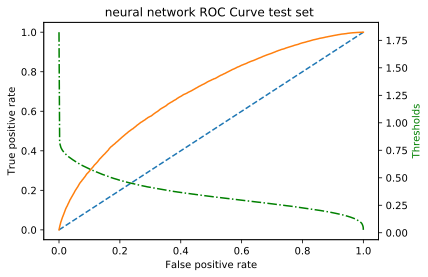

The area under the curve rate is: 0.6964281929964018

Classification Report for prediction on y_test

             precision    recall  f1-score   support

          0       0.68      0.83      0.75     39523
          1       0.62      0.42      0.50     26770

avg / total       0.66      0.66      0.65     66293



In [96]:
vaildmodel_reviews(mp,'neural network','neural network ROC Curve vaild set')
testmodel_reviews(mp,'neural network','neural network ROC Curve test set ')

#### $\text{Test model AUC 69.64%,sensitivity=67.9%  ,specificity=62.3%}$
$\text{Which is alittle bit better then our best model from our binary logistic models.}$
$\text{Lets try an ADA boosting model.}$
$\text{Ada boosting adjusts weights of incorrect classications to imporove model (so many simple different models), then it sums up these various sub models to come up with a really good combine complex classification model, lets check it out using our best found predictiors.}$
$\text{In theory this should greatly improve my predictions.}$

In [97]:
from sklearn.ensemble import AdaBoostClassifier
adc=AdaBoostClassifier(n_estimators=500,random_state=42)
adc.fit(model,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=500, random_state=42)

Computing the confusion_matrix for the fitted train model used on vaildation predictors.

[[16143  3619]
 [ 7192  6193]]

Classification Report for prediction on y_vaild

             precision    recall  f1-score   support

          0       0.69      0.82      0.75     19762
          1       0.63      0.46      0.53     13385

avg / total       0.67      0.67      0.66     33147

The Area under the Curve is: 0.7167468066101664


Computing the ROC curve

 Shows how well the model works with different thresholds.
 Ploting the ROC curve from y_vaild.


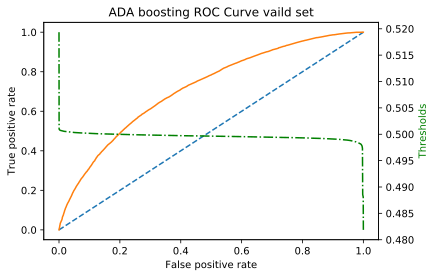

Computing the confusion_matrix for the fitted train model used on test predictors

Shows how well the train fit works on the test set via accuracy chart and Area under the ROC
[[32410  7113]
 [14511 12259]]
The area under the curve rate is: 0.7179317063490529


Computing the ROC curve

 Shows how well the model fits for different thresholds).

 True  postive rate vs False postive rate.

 Ploting the ROC curve from y_test ,y_hat_2.


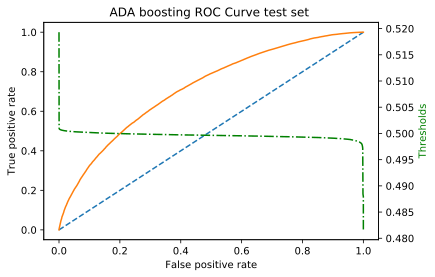

The area under the curve rate is: 0.7179317063490529

Classification Report for prediction on y_test

             precision    recall  f1-score   support

          0       0.69      0.82      0.75     39523
          1       0.63      0.46      0.53     26770

avg / total       0.67      0.67      0.66     66293



In [98]:
vaildmodel_reviews(adc,'ADA boosting','ADA boosting ROC Curve vaild set')
testmodel_reviews(adc,'ADA boosting','ADA boosting ROC Curve test set ')

$\text{As expected Ada boosting greatly improved my predictive model}$
$\text{Its interesting that this method where takes a lot of simple models and combines them to form a super complex model was very simple compared to my other models.}$
$\text{The test model AUC is 71.79% , sensitivity(True positive rate) = 69.07% ,specificity(True negative rate)=63.28% }$
$\text{This is my best model found.}$
$\text{Ada boosting was about to increase my true negative rate.}$

## $\text{Master conclusion}$

$\text{Our best model for predicting the sucess or failure of a kickstarter project was Adaptive Boosting on predictors found via binary logistic regression model fine tuning.}$

$\text{We can be 95% confident that the true population proportion of sucess is between [0.4038-0019965061,0.4038+0.0019965061] }$

$\text{From doing EDA and modeling, we have found some possible useful factors to consider when making a kickstarter project.}$

$\text{A projects name length, how long the project is open, and the amount of money being requested play a major role in the success or failoure of a kickstarter project.}$
$\text{Below are some of the possible best chance categories to do a kickstarter project in.}$

In [99]:
strong_fav_list.category

0         Anthologies
1            Chiptune
2     Classical Music
3         Comic Books
4      Country & Folk
5               Dance
6          Indie Rock
7                Jazz
8         Letterpress
9     Literary Spaces
10       Performances
11              Plays
12        Residencies
13     Tabletop Games
14            Theater
15         Typography
Name: category, dtype: object

In [100]:
weak_fav_list.category

0             Art Books
1      Camera Equipment
2                Comics
3       DIY Electronics
4             Festivals
5        Graphic Novels
6          Illustration
7             Immersive
8         Installations
9     Literary Journals
10                Music
11              Musical
12                  Pop
13           Public Art
14                 Punk
15                 Rock
16               Shorts
17            Webcomics
18                Zines
Name: category, dtype: object

$\text{For quick outputing files:}$

In [ ]:
print(x_trains.shape,x_vailds.shape,x_tests.shape,y_train.shape,y_vaild.shape,y_test.shape)
x_vaild_s.to_csv('C:/Users/dragon/Desktop/csv_file/x_vaild.csv',encoding='utf=8',index=True)
y_train_s.to_csv('C:/Users/dragon/Desktop/csv_file/y_train.csv',encoding='utf-8',index=True)
y_vaild_s.to_csv('C:/Users/dragon/Desktop/csv_file/y_vaild.csv',encoding='utf=8',index=True)
test_s.to_csv('C:/Users/dragon/Desktop/csv_file/y_vaild.csv',,encoding='utf=8',index=True)
